# **Project Name**    -  Netflix Movies and TV Shows Clustering



##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Team Member 1 -**  Sudipta Samanta

# **Project Summary -**

Netflix movies and TV shows clustering is a data analysis and machine learning technique that Netflix uses to group its content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast, and plot, and using algorithms to identify patterns and similarities.
In this way, Netflix can provide its users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, leading to increased retention and company revenue.

# **GitHub Link -**

https://github.com/sudipta-DS

# **Problem Statement**


**Netflix is the world's largest online streaming service provider.t is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Sudipta/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Number of rows = ",df.shape[0])
print("Number of cols = ",df.shape[1])

Number of rows =  7787
Number of cols =  12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    7787
dtype: int64

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
null_value_count = list(df.isnull().sum().values)
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### What did you know about your dataset?

Till now, we have seen -
* our dataset has 7787 rows and 12 columns initially.
* None of the rows are duplicated.
* 'director' column has most null values.
* There is no dependent/Target Variable.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description

* show_id : Unique ID for every Movie / Tv Show
* type Identifier : A Movie or TV Show

* title : Title of the movie/show

* director : Director of the show

* cast : Actors involved

* Country : Country of production

* date_added : Date it was added on Netflix

* release year : Actual release year of the show

* rating : TV rating of the show

* duration : Total duration in minutes or number of seasons

* listed_in : Genre

* Description : The Summary description



**Description Metric details :**

*   count - Total number of non-null values in each column
*   mean - Mean of each column
*   std - Standard Deviation of each column
*   min - Minimum value of each column
*  25% - First Quartile(Q1) of each column
*  50% - Second Quartile(Q2) or Median of each column
*   75% - Third Quartile(Q3) of each column
*   max - Maximum value of each column






### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready.

In [12]:
df.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?


*   Dropped Duplicate rows to reduce computational complexity.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

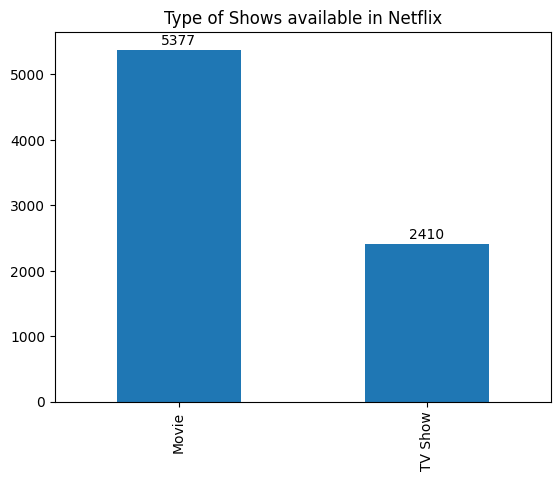

In [13]:
# Chart - 1 visualization code
df['type'].value_counts().plot(kind='bar')

y_coordinates = df['type'].value_counts().values
x_coordinates = [i for i in range(2)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Type of Shows available in Netflix')

plt.show()

##### 1. Why did you pick the specific chart?

I pick that above chart to understand the type of shows available in Netflix.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see number of Movies are higher than number of TV Show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This will not give negative impact on business growth as movies will have more budget and more audience.

#### Chart - 2

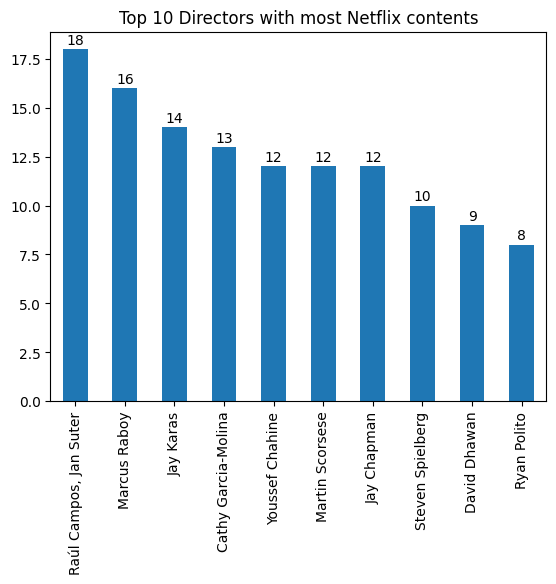

In [14]:
# Chart - 2 visualization code
df['director'].value_counts()[:10].plot(kind='bar')

y_coordinates = df['director'].value_counts().values
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Top 10 Directors with most Netflix contents')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the top 10 directors with most Netflix contents.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say that **Raul Campos,Jan Suter** made most of netflix contents. and **Ryan Polito** made less number of netflix contents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to energize more directors to made contents on Netflix.

#### Chart - 3

In [15]:
# Chart - 3 visualization code
temp = df.copy()
temp.dropna(inplace=True)
def casts(shows):
  cast_occurence = {}
  for cast in shows:
    cast_list = cast.split(',')
    for cast in cast_list :
      if cast not in cast_occurence.keys():
        cast_occurence[cast] = 1
      else:
        cast_occurence[cast] += 1

  return dict(sorted(cast_occurence.items(), key=lambda item: item[1],reverse=True))

cast_appearances = casts(temp['cast'].values)

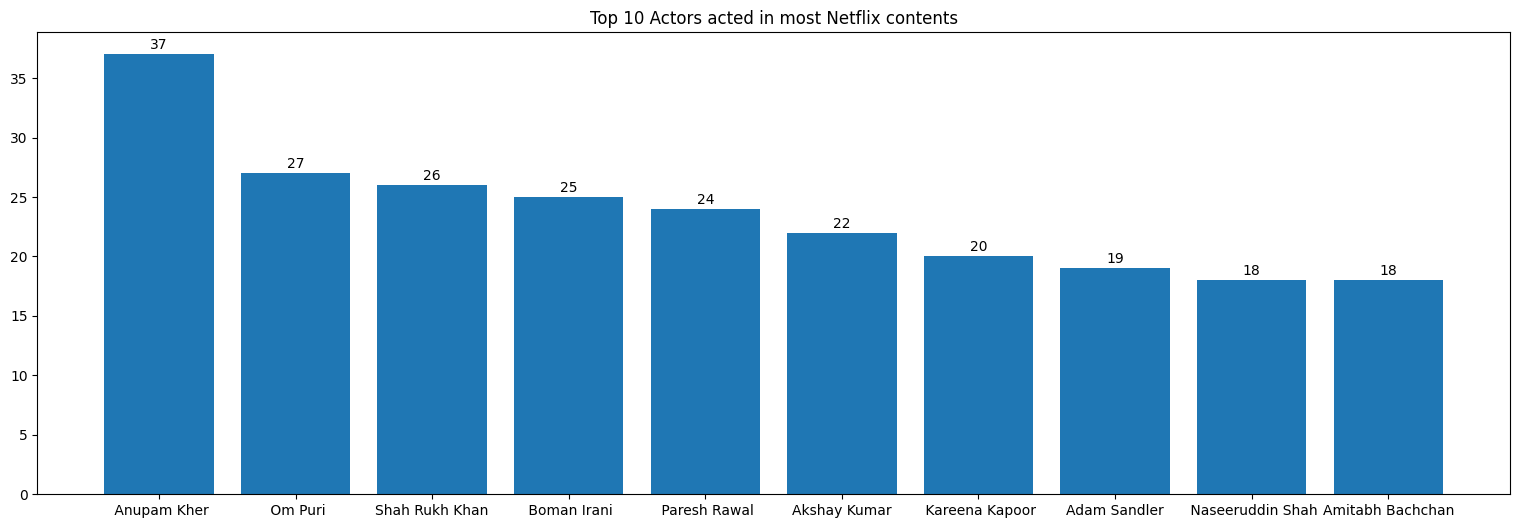

In [16]:
plt.figure(figsize=(19,6))
cast_10_names = list(cast_appearances.keys())[:10]
cast_10_appearences = list(cast_appearances.values())[:10]

for x,y in zip(cast_10_names,cast_10_appearences):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Top 10 Actors acted in most Netflix contents')


plt.bar(x=cast_10_names,height=cast_10_appearences)
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see Top 10 Actors acted in most Netflix contents.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **Anupam Kher** has acted most of the shows in Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more actor engagements for better growth.

#### Chart - 4

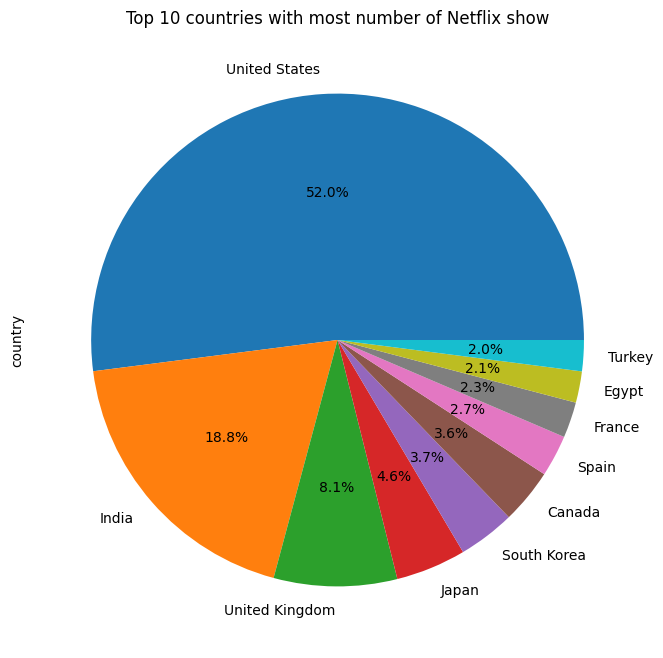

In [17]:
plt.figure(figsize=(8,8))
df['country'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 10 countries with most number of Netflix show')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see Top 10 countries with most number of Netflix show.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see **52.0 %** shows are **USA** based.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more country engagements for better growths.

#### Chart - 5

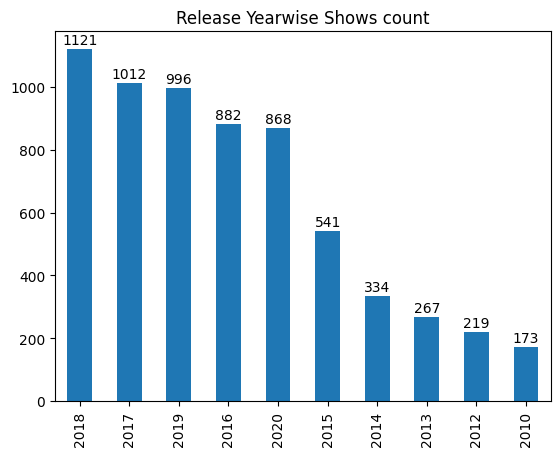

In [18]:
# Chart - 5 visualization code
df['release_year'].value_counts()[:10].plot(kind='bar')

y_coordinates = df['release_year'].value_counts()[:10].values
x_coordinates = [i for i in range(10)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Release Yearwise Shows count')


plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see the release yearwise shows count.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see in **2018** most number of shows released .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on adding more shows in future.

#### Chart - 6

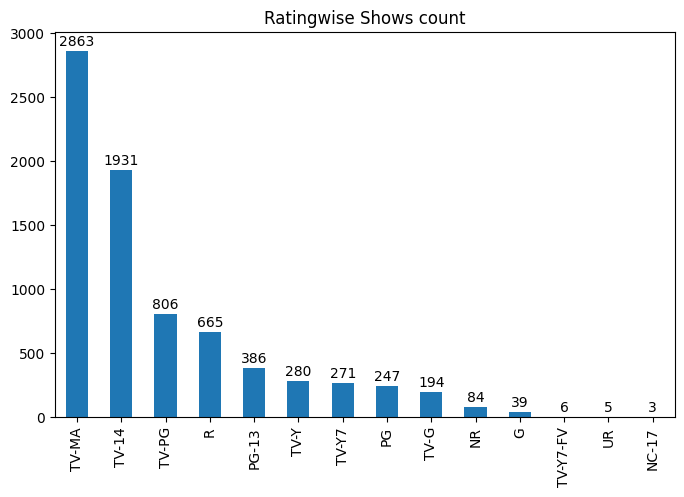

In [19]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))
df['rating'].value_counts().plot(kind='bar')

y_coordinates = df['rating'].value_counts().values
x_coordinates = [i for i in range(14)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ratingwise Shows count')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see the ratingwise shows count.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that most of Netflix shows are intended for Matured Category(**TV-MA**) audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on child contents and other contents than TV-MA.

#### Chart - 7

In [20]:
# Chart - 7 visualization code
def movie_duration(movie):
  lst = movie.split(' ')
  return int(lst[0])
df_movie = df[df['type']=='Movie']
df_movie['duration_time'] = df_movie['duration'].apply(lambda x : int(x.split(' ')[0]))

<Figure size 800x1000 with 0 Axes>

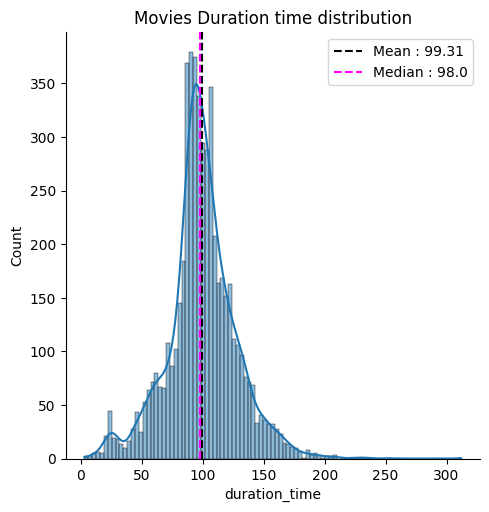

In [21]:
ax = plt.figure(figsize=(8,10))
sns.displot(data=df_movie,x='duration_time',ax=ax,kde=True)
plt.axvline(round(df_movie['duration_time'].mean(),2),linestyle='--',color='black',label='Mean : {}'.format(round(df_movie['duration_time'].mean(),2)))
plt.axvline(round(df_movie['duration_time'].median(),2),linestyle='--',color='magenta',label='Median : {}'.format(round(df_movie['duration_time'].median(),2)))
plt.title('Movies Duration time distribution')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand Movies duration time distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that mean duration time is **99.31 min** and median duration time is **98 min**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on short films as people has not much time to see Netflix.

#### Chart - 8

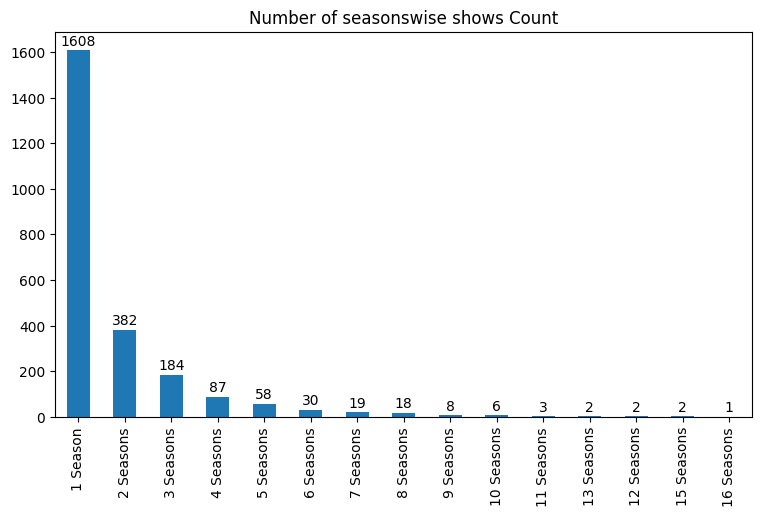

In [22]:
# Chart - 8 visualization code
plt.figure(figsize=(9,5))
df_tv_show = df[df['type']=='TV Show']
#df_tv_show['duration_time'] = df_tv_show['duration'].apply(lambda x : int(x.split(' ')[0]))
df_tv_show['duration'].value_counts().plot(kind='bar')

y_coordinates = df_tv_show['duration'].value_counts().values
x_coordinates = [i for i in range(16)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Number of seasonswise shows Count')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the Number of seasonswise shows Count.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can see most of the TV shows has only 1 season. .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more seasons and more interesting TV shows.

#### Chart - 9

In [23]:
# Chart - 9 visualization code
temp1 = df.copy()
temp1.dropna(inplace=True)
def genres(shows):
  genres = {}
  for genre in shows:
    genre_list = genre.split(', ')
    for gen in genre_list :
      if gen.strip() not in list(genres.keys()):
        key = gen.strip()
        genres[key] = 1
      else:
        key = gen.strip()
        genres[key] += 1

  return dict(sorted(genres.items(), key=lambda item: item[1],reverse=True))

genre_appearances = casts(temp1['listed_in'].values)

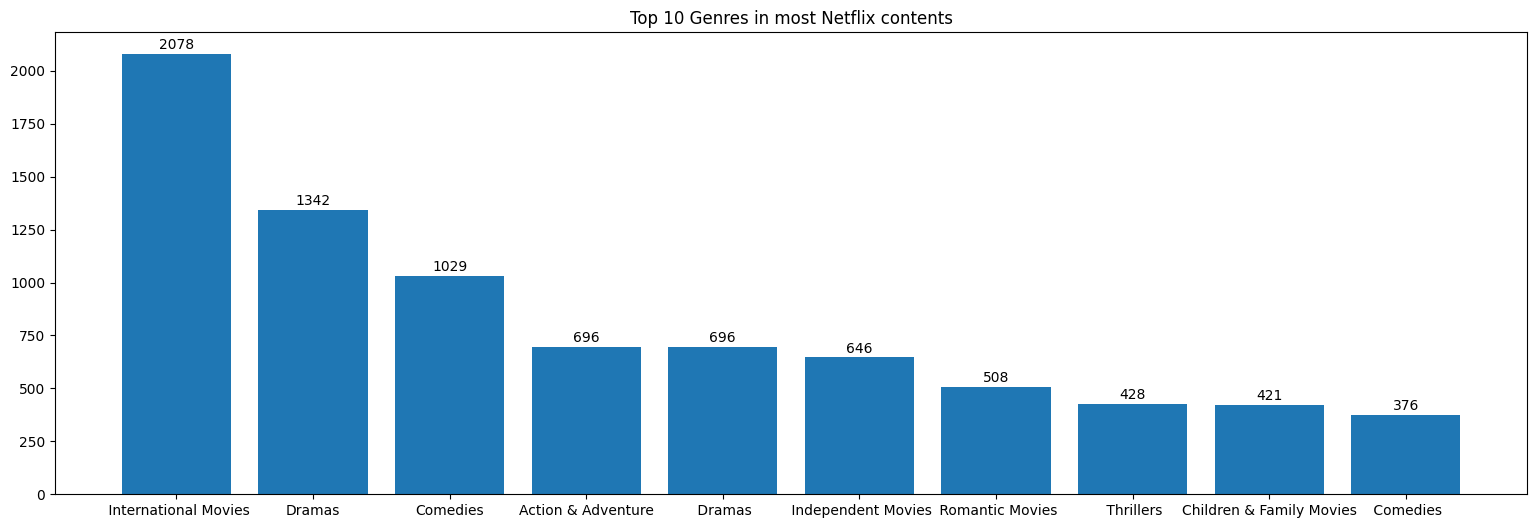

In [24]:
plt.figure(figsize=(19,6))
top_10_genres = list(genre_appearances.keys())[:10]
top_10_genre_appearences = list(genre_appearances.values())[:10]

for x,y in zip(top_10_genres,top_10_genre_appearences):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Top 10 Genres in most Netflix contents')


plt.bar(x=top_10_genres,height=top_10_genre_appearences)
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand the Top 10 Genres in most Netflix contents.

##### 2. What is/are the insight(s) found from the chart?

We can see that Most of the shows are in International Movies, Dramas,Comedies genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more contents from other genres.

#### Chart - 10

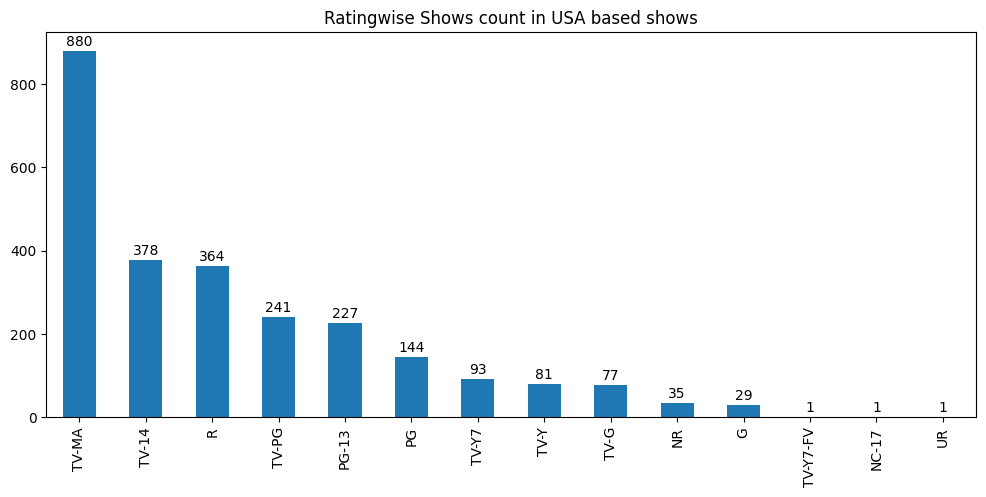

In [25]:
# Chart - 10 visualization code
plt.figure(figsize=(12,5))
df_usa = df[df['country']=='United States']
df_usa['rating'].value_counts().plot(kind='bar')

y_coordinates = df_usa['rating'].value_counts().values
x_coordinates = [i for i in range(14)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ratingwise Shows count in USA based shows')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand Ratingwise shows count in USA based shows.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see most of the shows are from Matured Audience Categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart we can say we have to focus on more films for kids.

#### Chart - 11

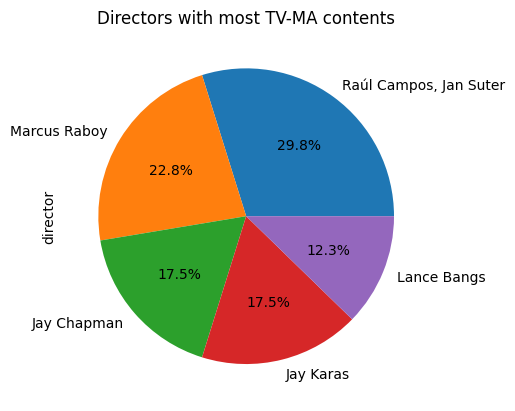

In [26]:
# Chart - 11 visualization code
df_matured_directors = df[df['rating'] == 'TV-MA']
df_matured_directors['director'].value_counts()[:5].plot(kind='pie',autopct='%1.1f%%')
plt.title('Directors with most TV-MA contents')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand understand Directors with most TV-MA contents.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **Raul Campos and Jan Suter** made most number of TV-MA contents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more director enagagements in any sector.

#### Chart - 12

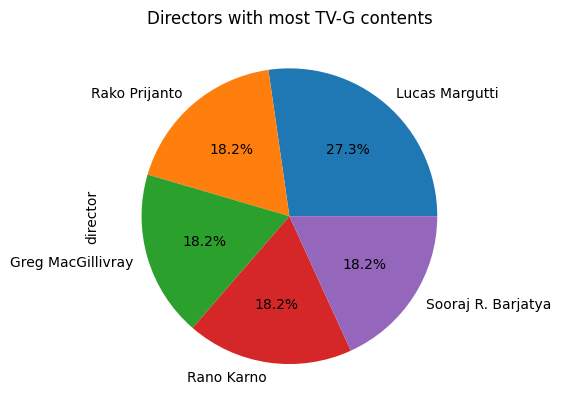

In [27]:
# Chart - 12 visualization code
df_matured_directors = df[df['rating'] == 'TV-G']
df_matured_directors['director'].value_counts()[:5].plot(kind='pie',autopct='%1.1f%%')
plt.title('Directors with most TV-G contents')
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to understand understand Directors with most TV-G contents.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that **Lucas Margutti** made most number of TV-G contents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more director enagagements in TV-G contents.

#### Chart - 13

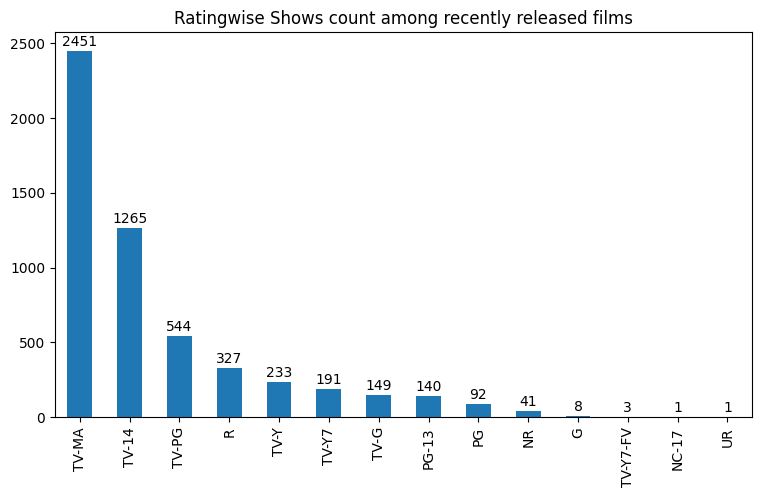

In [28]:
# Chart - 13 visualization code
plt.figure(figsize=(9,5))
df_recent = df[df['release_year']>=2015]
df_recent['rating'].value_counts().plot(kind='bar')

y_coordinates = df_recent['rating'].value_counts().values
x_coordinates = [i for i in range(14)]

for x,y in zip(x_coordinates,y_coordinates):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset pixels", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ratingwise Shows count among recently released films')

plt.show()

##### 1. Why did you pick the specific chart?

I pick the above chart to see Ratingwise Shows count among recently released films.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see in recent times TV-MA contents are made most of the time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on more contents on more genres.

#### Chart - 14 - Correlation Heatmap

In [29]:
# Correlation Heatmap visualization code
temp3 = df.copy()
categorical_columns=list(set(temp3.columns.to_list()).difference(set(temp3.describe().columns.to_list())))
numerical_columns = temp3.describe().columns
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['country', 'listed_in', 'date_added', 'show_id', 'director', 'type', 'duration', 'title', 'cast', 'description', 'rating']


In [30]:
for cat_col in categorical_columns:
  if cat_col not in ['date_flown','review_date']:
    le = LabelEncoder()
    temp3[cat_col] = le.fit_transform(temp3[cat_col])

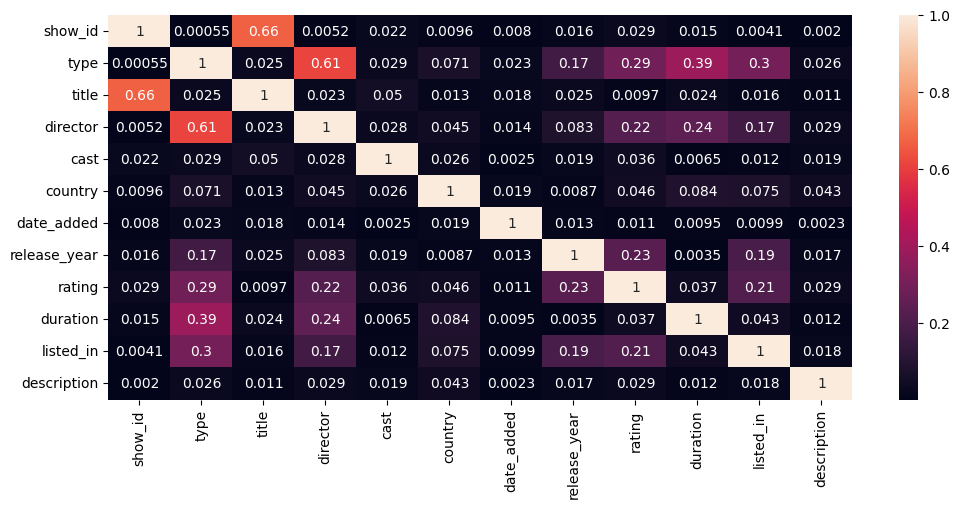

In [31]:
plt.figure(figsize=(12,5))
sns.heatmap(abs(temp3.corr()),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

I pick that above correlation Heatmap to understand if there is any multi-colinearity.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **type and director** has a collinearity.**title and show_id** also has collinearity.

#### Chart - 15 - Pair Plot

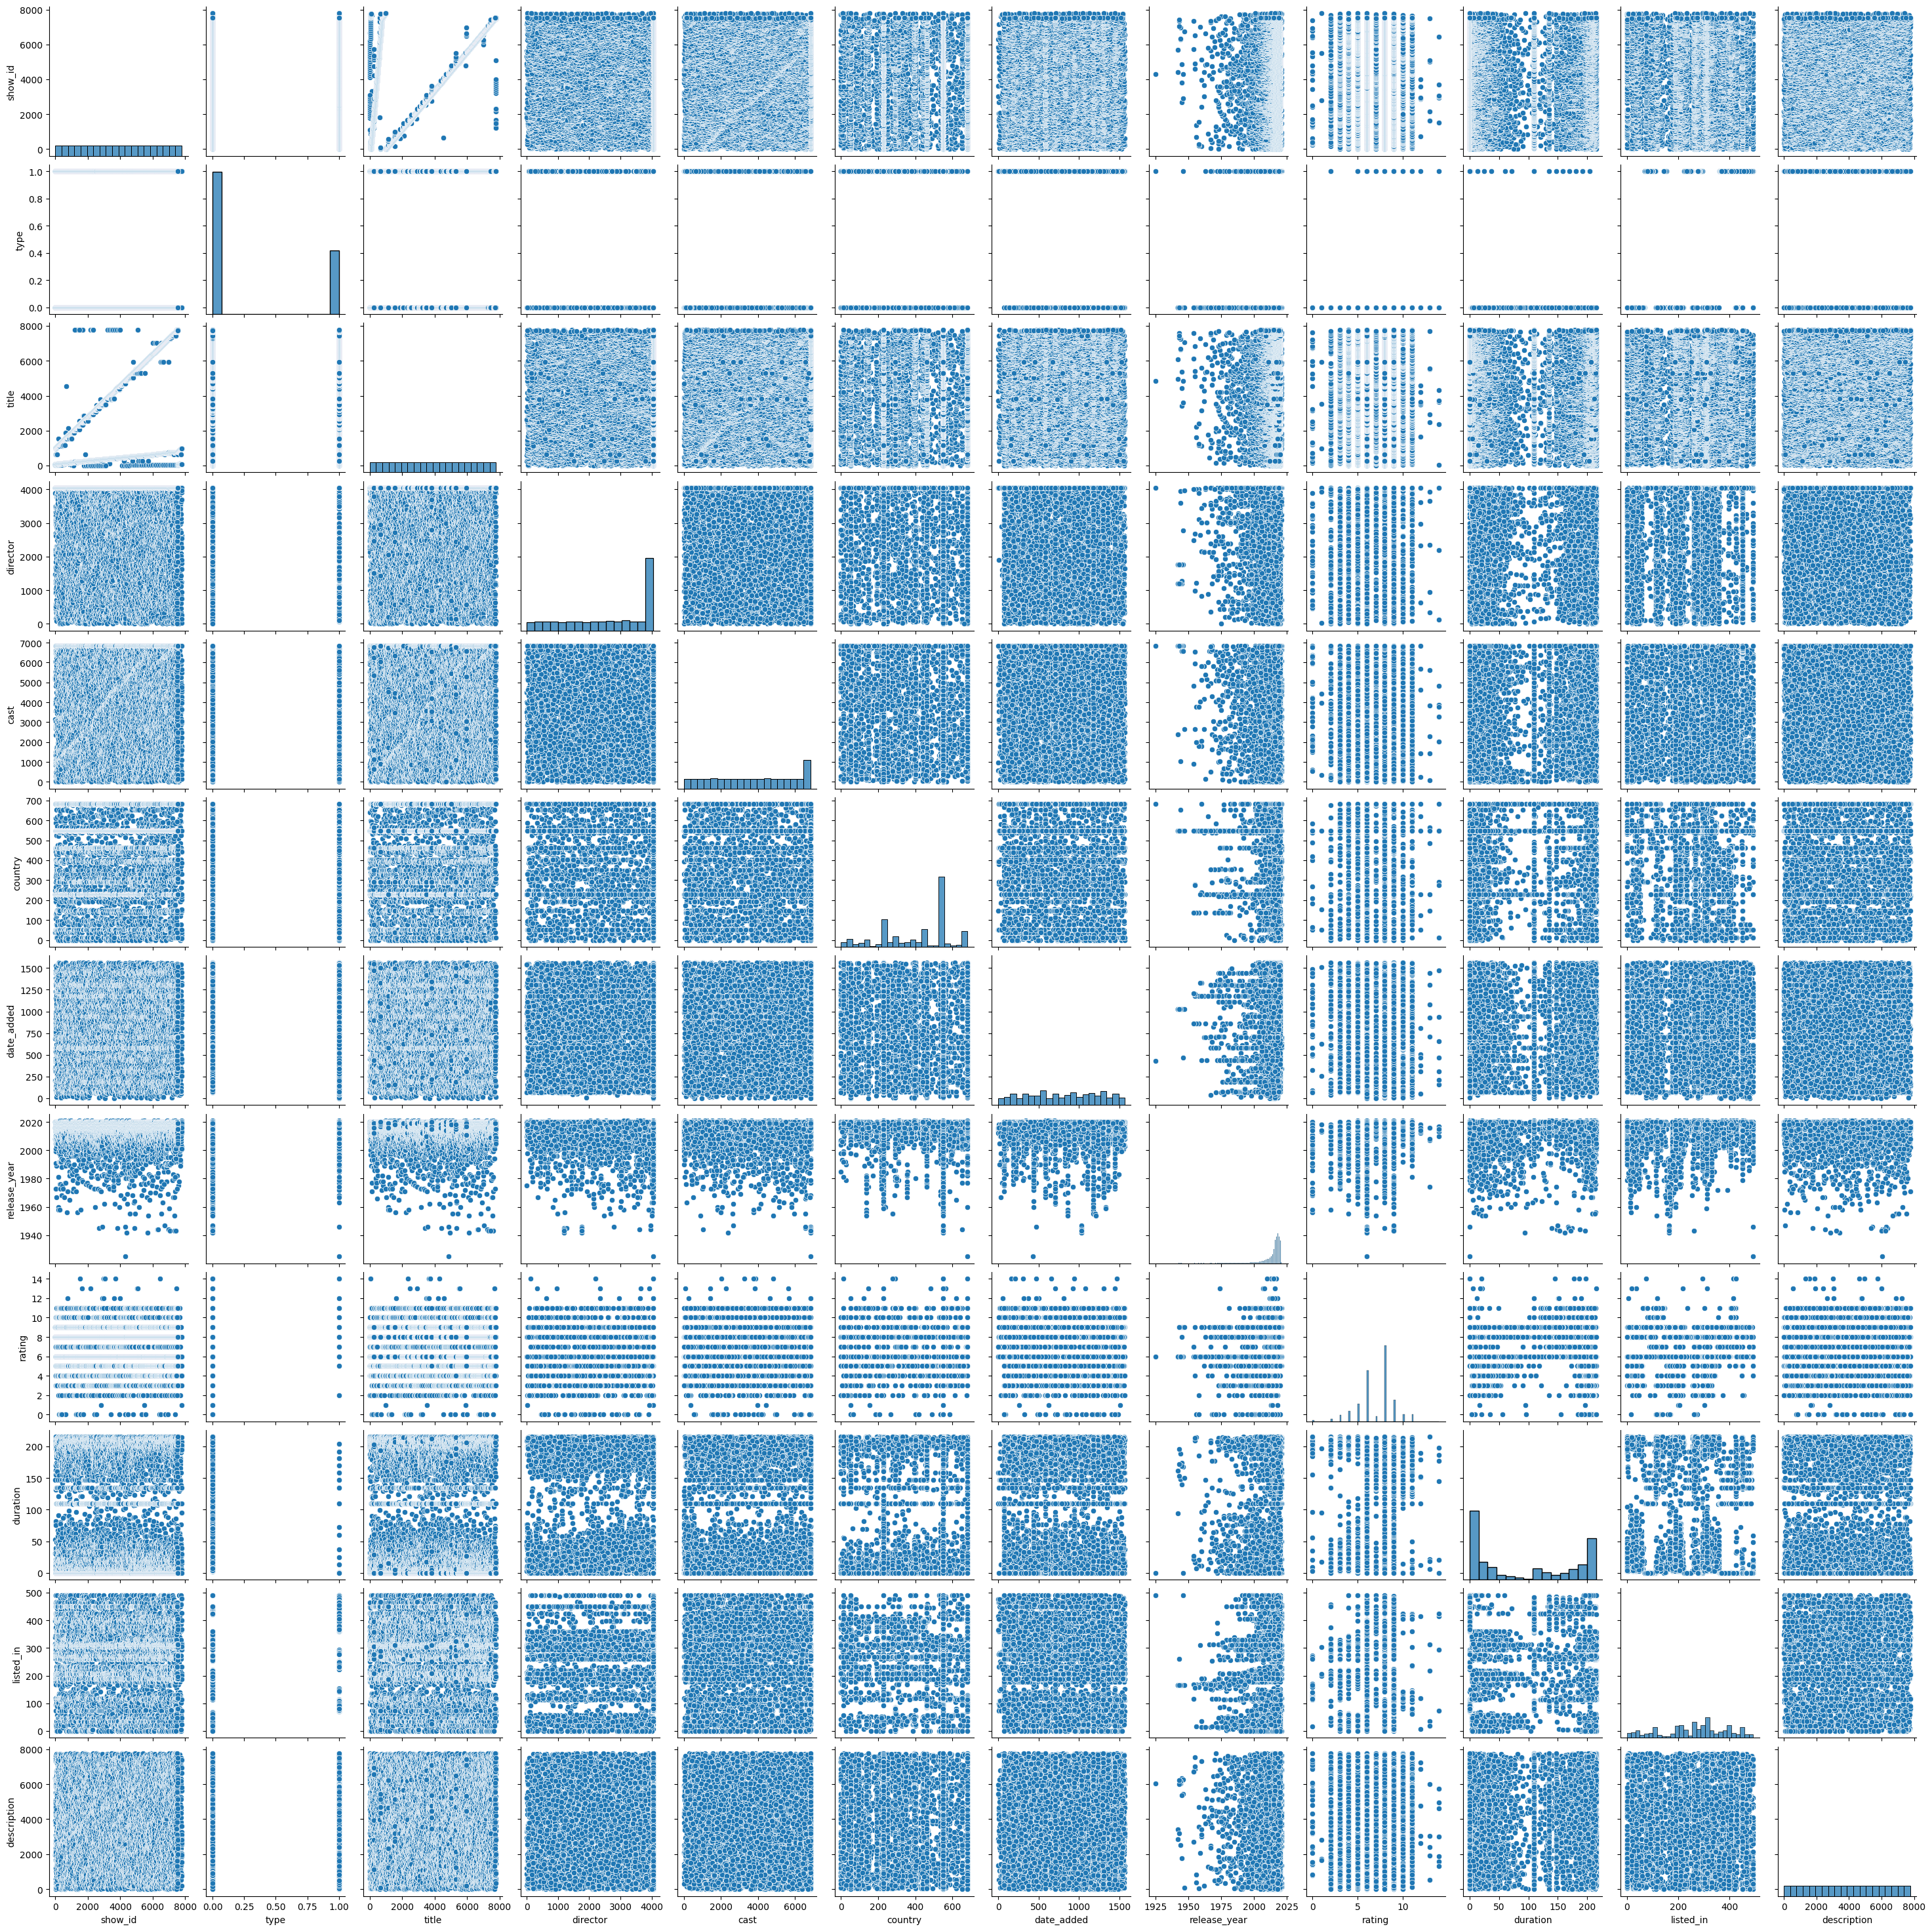

In [32]:
# Pair Plot visualization code
sns.pairplot(temp3)
plt.show()

##### 1. Why did you pick the specific chart?

I pick the above pairplot to plot pairwise relationships between variables within a dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see **type and director** has a collinearity.**title and show_id** also has collinearity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average movie duration is 99.31 min.
2. 52.0% Netflix shows are made in United States.
3. 18.8% Netflix shows are made in India.

### Hypothetical Statement - 1

The average movie duration is 99.31 min.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 99.31

Alternate Hypothesis : N > 99.31

Test Type: Right tailed z-test

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
sample_size=800
movie_duration_sample=np.random.choice(df_movie['duration_time'].values,sample_size)

ztest_Score, p_value= ztest(movie_duration_sample,value = 99.31, alternative='larger')
print(p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.5609539152509246
we are accepting null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used right tailed z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has not been rejected and average movie duration in Netflix is 99.31.

##### Why did you choose the specific statistical test?

<Figure size 800x1000 with 0 Axes>

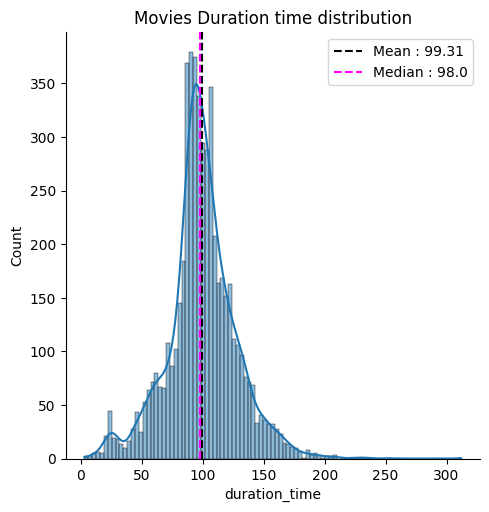

In [34]:
ax = plt.figure(figsize=(8,10))
sns.displot(data=df_movie,x='duration_time',ax=ax,kde=True)
plt.axvline(round(df_movie['duration_time'].mean(),2),linestyle='--',color='black',label='Mean : {}'.format(round(df_movie['duration_time'].mean(),2)))
plt.axvline(round(df_movie['duration_time'].median(),2),linestyle='--',color='magenta',label='Median : {}'.format(round(df_movie['duration_time'].median(),2)))
plt.title('Movies Duration time distribution')
plt.legend()
plt.show()

As shown in the figure we can see average movie duration in Netflix is 99.31.

### Hypothetical Statement - 2

52.0% Netflix shows are made in United States.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: p = 0.52

Alternate Hypothesis : p > 0.52

Test Type: One proportion z-test

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
ztest_Score, p_value= proportions_ztest(count=53, nobs=100, value=0.52,alternative='larger')
print(round(p_value,2))

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.42
we are accepting null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used One sample proportion Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis cannot be rejected and We can say 52% Netflix contents are made in United States.

##### Why did you choose the specific statistical test?

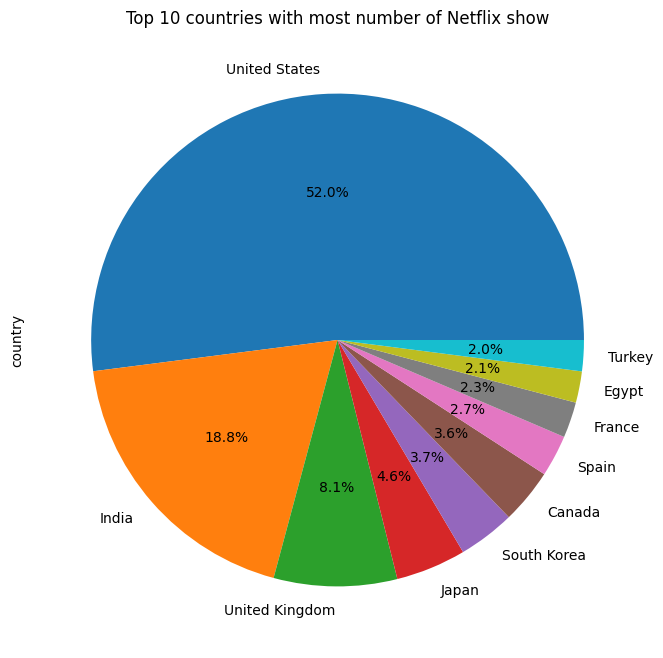

In [36]:
plt.figure(figsize=(8,8))
df['country'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 10 countries with most number of Netflix show')
plt.show()

As shown in the figure we can see 52.0% NetFlix contents are made in United States. I have used One proportion Z-Test directly.

### Hypothetical Statement - 3

18.8% Netflix shows are made in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: p = 0.188

Alternate Hypothesis : p > 0.188

Test Type: One proportion z-test

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
ztest_Score, p_value= proportions_ztest(count=19, nobs=100, value=0.188,alternative='larger')
print(round(p_value,2))

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.48
we are accepting null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used one sample z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has not been rejected and we can say that 18.8% Netflix shows are made in India.

##### Why did you choose the specific statistical test?

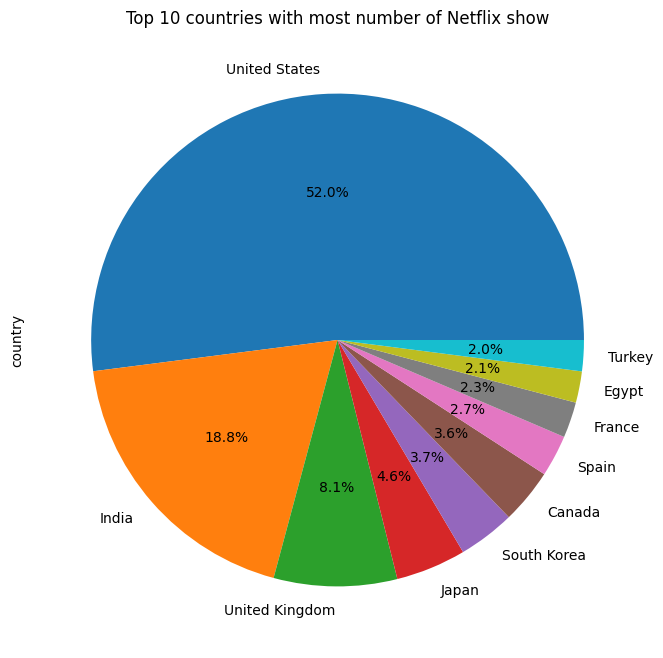

In [38]:
plt.figure(figsize=(8,8))
df['country'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title('Top 10 countries with most number of Netflix show')
plt.show()

As shown in the figure we can see 18.8% NetFlix contents are made in India. I have used One proportion Z-Test directly.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [39]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()/df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [40]:
df.drop('director',axis=1,inplace=True)

In [41]:
df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

* 'director' column has most number of null values(30%). So we are gonna drop this column.
* Rest of the columns which consists null values. we are gonna drop null rows only.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

As our most of the independent variables are categorical. So we did not use any outlier detection and restriction technique.

### 3. Categorical Encoding

In [42]:
# Encode your categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
numerical_columns = df.describe().columns
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['country', 'listed_in', 'date_added', 'show_id', 'duration', 'type', 'title', 'cast', 'description', 'rating']


In [43]:
for cat_col in categorical_columns:
  if cat_col not in ['description','cast','listed_in']:
    le = LabelEncoder()
    df[cat_col] = le.fit_transform(df[cat_col])

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used **LabelEncoder()** to encode categorical values .Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [44]:
# Expand Contraction
temp_text = df.copy()

#### 2. Lower Casing

In [45]:
# Lower Casing
temp_text['description'] = temp_text['description'].str.lower()

#### 3. Removing Punctuations

In [46]:
# Remove Punctuations
import string
punc = string.punctuation

In [47]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',punc))

In [48]:
temp_text['description'] = temp_text['description'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [49]:
# Remove URLs & Remove words and digits contain digits
import re
def remove_urls(text):
    pattern = re.compile('https?://\S+|www\.\S+')
    return pattern.sub('',text)

In [50]:
temp_text['description'] = temp_text['description'].apply(remove_urls)

#### 5. Removing Stopwords & Removing White spaces

In [51]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
# Remove Stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stop_words(text):
    new_text = []
    for word in text.split():
        if word in stop_words:
            new_text.append('')
        else :
            new_text.append(word)
    return " ".join(new_text)

In [53]:
temp_text['description'] = temp_text['description'].apply(remove_stop_words)

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization
from nltk.tokenize import word_tokenize,sent_tokenize
temp_text['description'] = temp_text['description'].apply(word_tokenize)

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


def stem_words(text):
    new_lst = []
    for i in text:
        new_lst.append(ps.stem(i))
    return new_lst

In [57]:
temp_text['description'] = temp_text['description'].apply(stem_words)

In [58]:
temp_text['description'] = temp_text['description'].apply(lambda x : " ".join(x))

##### Which text normalization technique have you used and why?

I have used PorterStemmer.

#### 9. Part of speech tagging

In [59]:
# POS Taging

#### 10. Text Vectorization

In [60]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

In [61]:
x_text = tf_idf.fit_transform(temp_text['description']).toarray()

In [62]:
x_text.shape

(6643, 13188)

##### Which text vectorization technique have you used and why?

I have used Tf-IDF vectorizer.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [63]:
def genre_parser(genres):
  gnres_lst = genres.split(',')
  return gnres_lst[0]

df['listed_in'] = df['listed_in'].apply(genre_parser)
encoder = LabelEncoder()
df['listed_in'] = encoder.fit_transform(df['listed_in'])

#### 2. Feature Selection

In [64]:
df.drop(['show_id','title','cast', 'date_added', 'duration', 'description'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

* 'Show_id','title','cast','date_added','duration : This variables has higher variance.
* 'description' : We have extracted all important features from description column.

##### Which all features you found important and why?

Rest of the features are important for our machine learning model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

As our data doesnot have high variability . So we did not used any transformation in our data.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

We will use standard scaler for standardization.

In [65]:
from sklearn.preprocessing import StandardScaler
for col in df.columns[1:]:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We will use dimensionality reduction. As our extracted features from description has higher dimensionality.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principal component Analysis for feature reduction.

In [66]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(x_text)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

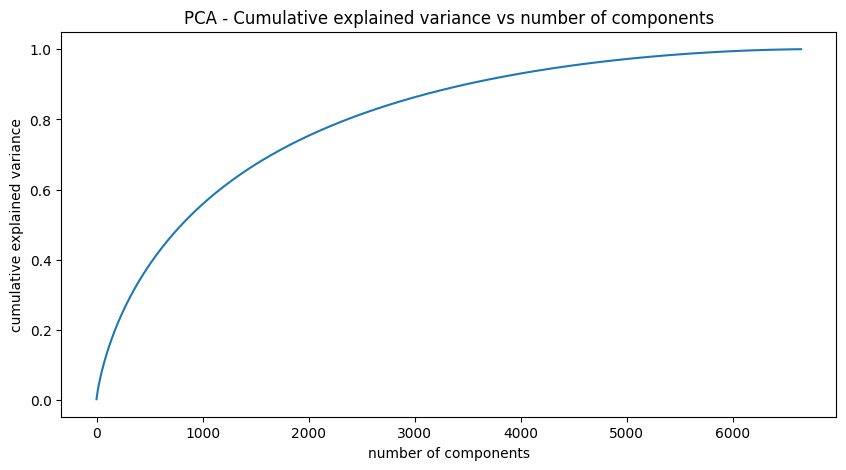

In [67]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [68]:
pca = PCA(n_components=6000,random_state=42)
pca.fit(x_text)

PCA(n_components=6000, random_state=42)

In [69]:
x_pca = pca.transform(x_text)

In [70]:
df_text = pd.DataFrame(x_pca,columns=['x{}'.format(i) for i in range(1,6001)])

In [71]:
df_final = pd.concat([df,df_text],axis=1)

About 5000 components describing 90% variance. So we will compressed data to 5000 components.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

We split our data as our task is to find optimal number of clusters.

In [72]:
x = df.values

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Our dataset doesnot contain any dependent variablee.So there is no question of imbalanced dataset.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

## ***7. ML Model Implementation***

### ML Model - 1 (KMeans Clustering)

In [73]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=25)
  kmeans.fit(x)
  wcss_base = kmeans.inertia_
  wcss.append(wcss_base)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Text(0, 0.5, 'WCSS')

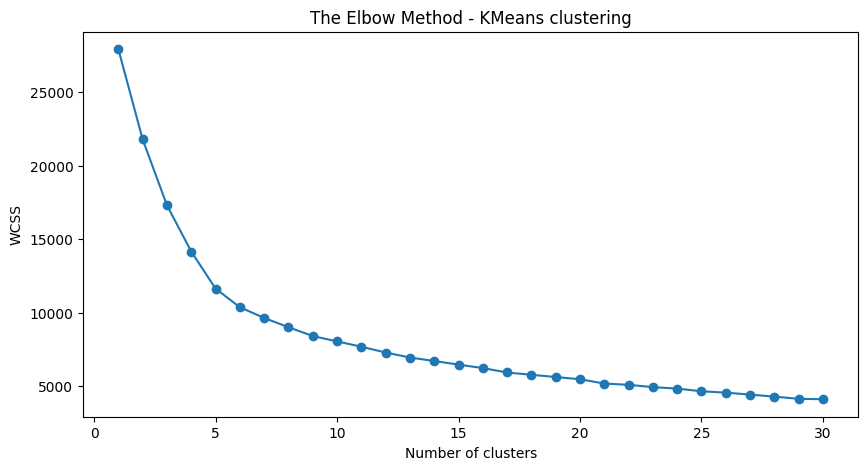

In [74]:
# Visualizing evaluation Metric Score chart
number_clusters = [i for i in range(1,31)]
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss,marker='o')
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From above graph we can say that our optimal number of clusters are 5 clusters.

In [75]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=25)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=25)

In [76]:
from sklearn.metrics import silhouette_score
silhouete=[]
for i in range(2,30):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=25)
  kmeans.fit(x)
  silhouete.append(silhouette_score(x, kmeans.labels_))

Text(0, 0.5, 'Silhouete Score')

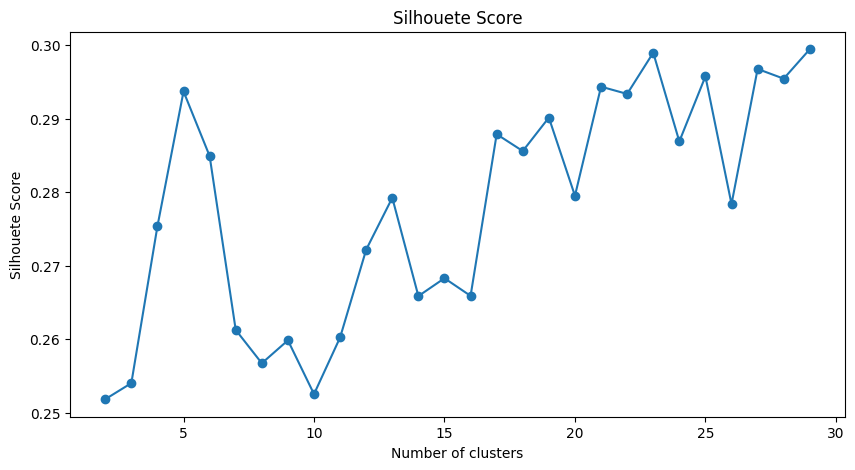

In [77]:
number_clusters = [i for i in range(2,30)]
plt.figure(figsize=(10,5))
plt.plot(number_clusters,silhouete,marker='o')
plt.title('Silhouete Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouete Score')

In [78]:
print('Silhouete Score for 5 clusters is : {}'.format(silhouette_score(x,kmeans.labels_)))

Silhouete Score for 5 clusters is : 0.2994495206630907


### ML Model - 2 (Hirerchial Clustering Algorithm)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

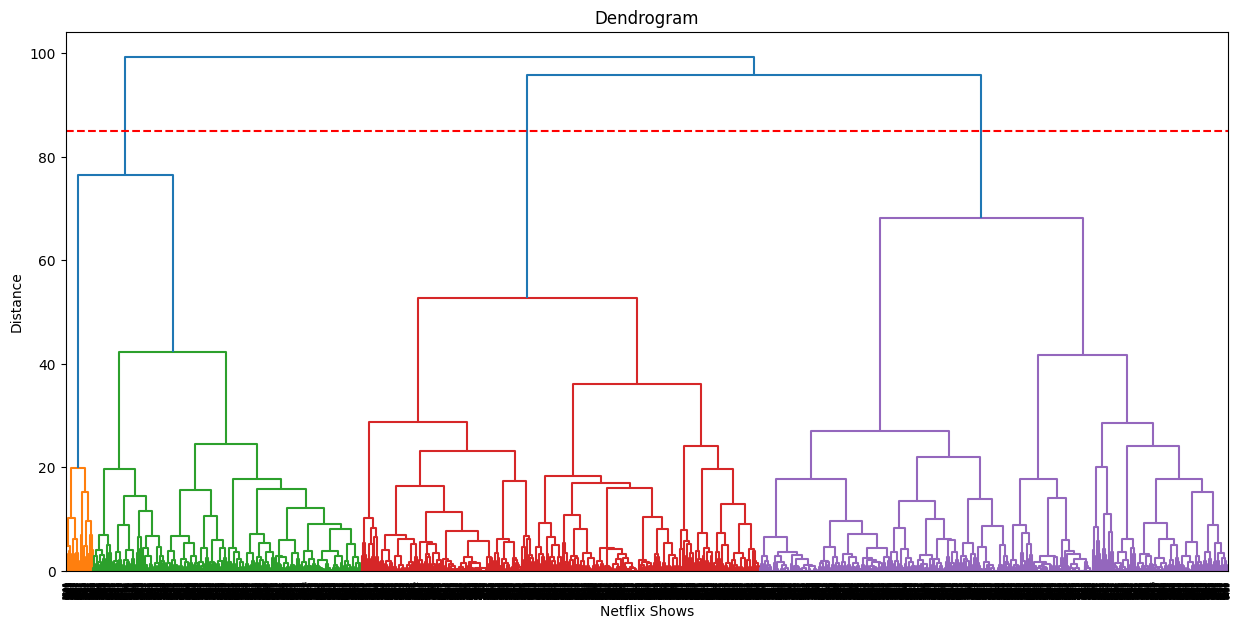

In [79]:
# Initializing Decision Tree Regressor model
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 85, color='r', linestyle='--')

From above dendogram we are taking 3 clusters.As in 80th point there is the biggest uncutted line,

In [80]:
hierar_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierar_cluster.fit_predict(x)

array([2, 1, 2, ..., 1, 2, 2])

In [81]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, hierar_cluster.labels_))

0.2319774293959514


### ML Model - 3 (Density-Based Spatial Clustering Of Applications With Noise (DBSCAN))

In [82]:
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
db_base = DBSCAN(eps = 1, min_samples = 250).fit(x)
labels = db_base.labels_
silhouette_score(x,db_base.labels_)

0.022472687401545996

#### 1.  Cross- Validation & Hyperparameter Tuning

In [83]:
eps = [0.5,1,1.5,2,2.5,3]
sil_eps = []
for ep in eps :
  db_hyper = DBSCAN(eps = ep, min_samples = 250).fit(x)
  labels = db_hyper.labels_
  sil_eps.append(silhouette_score(x,db_hyper.labels_))

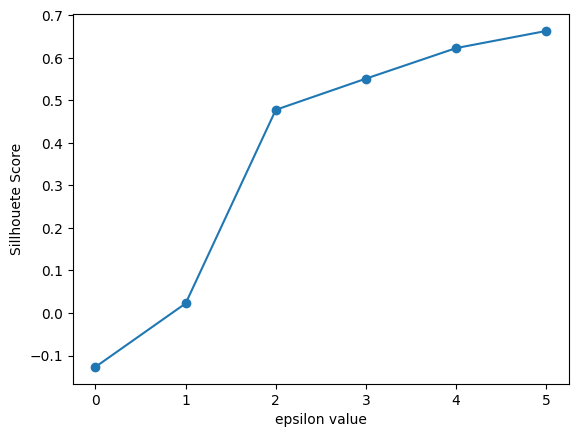

In [89]:
x_axis=[i for i in range(6)]
plt.plot(x_axis,sil_eps,marker='o')
plt.xlabel('epsilon value')
plt.ylabel('Sillhouete Score')
plt.show()

As we can see that there is significant change in silhouete score with the change of epsilon value. We are taking 5 as epsilon value.

##### Which hyperparameter optimization technique have you used and why?

I used epsilon as our hyperparameter.Made a for loop and list of epsilon values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can see a heavy change in Silhouete Score.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In clustering problems we have metrics like Silhouete Score. Our aim is to increase the value of silhouete Score.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

DBSCAN model giving us better silhouete Score. So we will use DBSCAN as our final model.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [85]:
# Save the File
import pickle
file = open('db_hyper.pkl', 'wb')
pickle.dump(db_hyper,file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [87]:
# Load the File and predict unseen data.
file = open('db_hyper.pkl', 'rb')
model = pickle.load(file)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This study focused on predicting the Netflix Movies and TV Shows clustering using given dataset. Clustering techniques like KMeans Clustering,Hirerchichal Clustering,DBSCAN are used to predict the optimal number of clusters. This statistical data analysis shows interesting outcomes in clustering method and also in an exploratory analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***